## <font color='blue'>Data Science Academy</font>
## <font color='blue'>Big Data Real-Time Analytics com Python e Spark</font>

## <font color='blue'>Formação Cientista de Dados DSA</font>
## <font color='blue'>Prevendo Customer Churn em Operadoras de Telecom </font>

Customer Churn, ou rotatividade de Clientes, refere-se a decisão do cliente sobre o término do relacionamento comercial, ou seja, perda do cliente. Dessa forma, é importante prever os usuários que provavelmente abandonarão o relacionamento comercial e os fatores que afetam as decisões do cliente. 


Neste Projeto iremos prever o Customer Churn em uma Operadora de Telecom

<h3>Importando as bibliotecas</h3>

In [1]:
#instalando modulo imblearn para importar o pacote SMOTE
#!pip install imblearn

In [2]:
#manipulação e visualização
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression

#métricas de avaliação
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#reamostragem dos dados
from imblearn.over_sampling import SMOTE
from collections import Counter

#salvando o modelo
import pickle

#warnings
import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

### Leitura dos arquivos e análise exploratória de treino e teste

In [3]:
treino = pd.read_csv('telecom_treino.csv')

In [4]:
teste = pd.read_csv('telecom_teste.csv')

In [5]:
treino.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [6]:
teste.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,HI,101,area_code_510,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,2,MT,137,area_code_510,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,4,NM,99,area_code_415,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,5,SC,108,area_code_415,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


In [7]:
treino.columns

Index(['Unnamed: 0', 'state', 'account_length', 'area_code',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [8]:
#Função para excluir a primeira coluna dos arquivos de dados pois são colunas sem informação relevante
def drop_first_colunnm(df):
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    return df

In [9]:
drop_first_colunnm(treino)
drop_first_colunnm(teste)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no
5,IA,117,area_code_415,no,no,0,226.5,85,38.51,141.6,68,12.04,223.0,90,10.04,6.9,5,1.86,1,no
6,ND,63,area_code_415,no,yes,32,218.9,124,37.21,214.3,125,18.22,260.3,120,11.71,12.9,3,3.48,1,no
7,LA,94,area_code_408,no,no,0,157.5,97,26.78,224.5,112,19.08,310.8,106,13.99,11.1,6,3.00,0,no
8,MO,138,area_code_510,no,no,0,89.1,117,15.15,126.8,46,10.78,190.5,71,8.57,9.9,4,2.67,2,no
9,TX,128,area_code_415,no,yes,43,177.8,100,30.23,147.3,89,12.52,194.2,92,8.74,11.9,1,3.21,0,no


In [10]:
treino.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


 Verificando o tamanho dos arquivos

In [11]:
print('Qnt linhas do dataframe treino: ', treino.shape[0])
print('Qnt colunas do dataframe treino: ', treino.shape[1])

Qnt linhas do dataframe treino:  3333
Qnt colunas do dataframe treino:  20


In [12]:
print('Qnt linhas do dataframe teste: ', teste.shape[0])
print('Qnt colunas do dataframe teste: ', teste.shape[1])

Qnt linhas do dataframe teste:  1667
Qnt colunas do dataframe teste:  20


Verificando valores nulos ou N/A

In [13]:
treino.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [14]:
treino.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [15]:
teste.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [16]:
teste.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Verificando tipo de variávies


In [17]:
treino.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

Verificando informacões estatísticas

In [18]:
treino.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [19]:
#Verifica se pode haver desbalanceamento das classes
treino.groupby('churn').size()

churn
no     2850
yes     483
dtype: int64

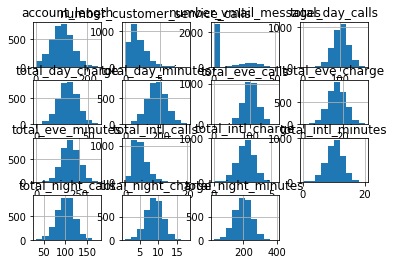

In [20]:
#Observando distribuição dos dados
treino.hist()
plt.show()

## Pré-processamento dos dados

In [21]:
#Transformando string em variaveis categoricas

def string_to_categorical(df):
    object_cols = ['international_plan', 'voice_mail_plan', 'churn']
    label_encoder = LabelEncoder()
    for col in object_cols:
        df[col] = label_encoder.fit_transform(df[col])
        df[col] = df[col]
    return df

In [22]:
treino_encoder = string_to_categorical(treino)

treino_encoder.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,area_code_510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,MO,147,area_code_415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,LA,117,area_code_408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,WV,141,area_code_415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


In [23]:
teste_encoder = string_to_categorical(teste)

In [24]:
treino_encoder.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                 int32
voice_mail_plan                    int32
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                              int32
dtype: object

In [25]:
# Retirando variáveis que não trazem muita informação e variáveis qualitativas, para que seja utilizado padronização dos dados
# com as demais variáveis quantitativas

drop_colunms = ['state', 'area_code']

treino_df = treino_encoder.drop(drop_colunms, axis=1)
treino_df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [26]:
teste_df = teste_encoder.drop(drop_colunms, axis=1)
teste_df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,101,0,0,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
1,137,0,0,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
2,103,0,1,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
3,99,0,0,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
4,108,0,0,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0


In [27]:

#Verificando correlação entre variáveis
treino_df.corr()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
account_length,1.000000,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
international_plan,0.024735,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice_mail_plan,0.002918,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number_vmail_messages,-0.004628,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total_day_minutes,0.006216,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total_day_calls,0.038470,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total_day_charge,0.006214,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total_eve_minutes,-0.006757,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total_eve_calls,0.019260,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total_eve_charge,-0.006745,0.019106,0.021559,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786


## Variáveis que tiveram maior correlação: 
Correlação Positiva:

 international_plan;
 total_day_minutes;
 total_day_charge;
 number_customer_service_calls;

Correlação Negativa:

 voice_mail_plan;
    
        
        

### Separando Variável Target para Treino e Teste

In [28]:
#Variável target Y_treino
array_treino = treino_df.values
Y_treino = array_treino[:,17]

In [29]:
#Variável target Y_teste
array_teste = teste_df.values
Y_teste = array_teste[:,17]

## Seleção de Variáveis

Selecionando as melhores variáveis para o modelo utilizando o algoritmo SelectBest

In [30]:
def feature_selection(df):
    array = df.values
    X = array[:,0:17]
    Y = array[:,17]
    best_feature = SelectKBest(score_func=chi2, k = 5)
    fit = best_feature.fit(X, Y)
    features = fit.transform(X)
    return features

In [31]:
X_treino_features = feature_selection(treino_df)

In [32]:
#Variáveis selecionadas
X_treino_features

array([[  0.  ,  25.  , 265.1 ,  45.07, 197.4 ],
       [  0.  ,  26.  , 161.6 ,  27.47, 195.5 ],
       [  0.  ,   0.  , 243.4 ,  41.38, 121.2 ],
       ...,
       [  0.  ,   0.  , 180.8 ,  30.74, 288.8 ],
       [  1.  ,   0.  , 213.8 ,  36.35, 159.6 ],
       [  0.  ,  25.  , 234.4 ,  39.85, 265.9 ]])

In [33]:
Y_teste_features = feature_selection(teste_df)


In [34]:
Y_teste_features

array([[  0.  ,   0.  ,  70.9 ,  12.05, 211.9 ],
       [  0.  ,   0.  , 223.6 ,  38.01, 244.8 ],
       [  0.  ,  29.  , 294.7 ,  50.1 , 237.3 ],
       ...,
       [  0.  ,   0.  , 140.6 ,  23.9 , 172.8 ],
       [  0.  ,   0.  , 188.8 ,  32.1 , 171.7 ],
       [  0.  ,  34.  , 129.4 ,  22.  , 267.1 ]])

### Variáveis selecionadas com SelectKBest
international_plan; 
number_vmail_messages; 
total_day_minutes; 
total_day_charge; 
total_eve_minutes


Utilizando Eliminação Recursiva de Atributos (RFE) 

In [35]:
def feature_selection_rfe(df):
    array = df.values
    X = array[:,0:17]
    Y = array[:,17]
    modelo = LogisticRegression()
    rfe = RFE(modelo, n_features_to_select=5)
    features = rfe.fit(X, Y)
    print("Numero de atributos: %d" % features.n_features_)
    print("Variáveis Selecionadas: %s" % features.support_)
    print("Ranking de atributos: %s" % features.ranking_)
    return features

In [36]:
X_treino_RFE = feature_selection_rfe(treino_df)

Numero de atributos: 5
Variáveis Selecionadas: [False  True  True False False False False False False False False False
 False  True  True False  True]
Ranking de atributos: [ 8  1  1  2  6  5 11  9  4 12 10  3 13  1  1  7  1]


### Variáveis Selecionadas neste algoritmo(RFE): 
international_plan; voice_mail_plan; total_eve_charge; total_intl_calls; number_customer_service_calls

In [37]:
X_teste_RFE = feature_selection_rfe(teste_df)

Numero de atributos: 5
Variáveis Selecionadas: [False  True  True False  True False False False False False False False
 False False False  True  True]
Ranking de atributos: [ 9  1  1  2  1  5 10  8  3 12 11  4 13  6  7  1  1]


__O RFE selecionou variáveis diferentes utilizando treino_df e teste_df separados,  dessa forma não irei utilizar essa algoritmo para seleção de variáveis neste momento__


## Padronização dos dados

__Utilizando as variáveis selecionadas pelo SelectKBest__

In [38]:
#Função para padronizar os dados de treino e teste
def padroniza_dados(features): 
    X = features
    scaler = StandardScaler().fit(X)
    standardX = scaler.transform(X)
    return standardX    
   
    

In [39]:
# Dados de treino padronizados
X_treino = padroniza_dados(X_treino_features)

In [40]:
X_treino

array([[-0.32758048,  1.23488274,  1.56676695,  1.56703625, -0.07060962],
       [-0.32758048,  1.30794844, -0.33373776, -0.33401297, -0.10808036],
       [-0.32758048, -0.59175986,  1.16830364,  1.168464  , -1.57338336],
       ...,
       [-0.32758048, -0.59175986,  0.01881963,  0.01919334,  1.73193001],
       [ 3.05268496, -0.59175986,  0.62477766,  0.62515277, -0.81608006],
       [-0.32758048,  1.23488274,  1.00304237,  1.00320234,  1.28030903]])

In [41]:
# Dados de teste padronizados
X_teste = padroniza_dados(Y_teste_features)

In [42]:
X_teste

array([[-0.3144509 , -0.53417159, -2.09453397, -2.09494524,  0.23797956],
       [-0.3144509 , -0.53417159,  0.80210028,  0.80181634,  0.89312574],
       [-0.3144509 ,  1.65760038,  2.15082782,  2.15088596,  0.74377631],
       ...,
       [-0.3144509 , -0.53417159, -0.77236365, -0.77265615, -0.54062882],
       [-0.3144509 , -0.53417159,  0.14196359,  0.14234558, -0.56253341],
       [-0.3144509 ,  2.0354921 , -0.98482144, -0.98466875,  1.33719139]])

__Treinando o modelo Logistic Regression__

In [43]:
modelo = LogisticRegression(random_state= 42)

modelo.fit(X_treino, Y_treino)
score = modelo.score(X_treino, Y_treino)

In [44]:
# Verificando coeficientes

print('Coeficiente: \n', modelo.coef_)
print('Intercept: \n', modelo.intercept_)
print('Acurácia dos dados de treino: %.3f%%' % (score * 100.0) )

Coeficiente: 
 [[ 0.52891259 -0.34609234  0.31114017  0.31111823  0.29311449]]
Intercept: 
 [-2.06681451]
Acurácia dos dados de treino: 85.539%


In [45]:
predict = modelo.predict(X_teste)

In [46]:

result_df = pd.DataFrame(predict, columns=['Predict'])

In [47]:
result_df['Proba_0'] = modelo.predict_proba(X_teste)[:,0]
result_df['Proba_1'] = modelo.predict_proba(X_teste)[:,1]

In [48]:
result_df.head(20)

,Predict,Proba_0,Proba_1
0,0.0,0.963805,0.036195
1,0.0,0.783714,0.216286
2,0.0,0.777372,0.222628
3,0.0,0.886813,0.113187
4,0.0,0.909015,0.090985
5,0.0,0.864752,0.135248
6,0.0,0.913569,0.086431
7,0.0,0.898979,0.101021
8,0.0,0.972446,0.027554
9,0.0,0.971299,0.028701


### Avaliando Performance

__Matriz de confusão__

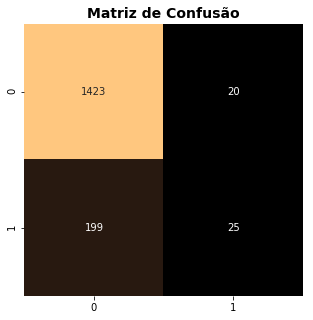

In [49]:
plt.figure(figsize=(5,5))

sns.heatmap(confusion_matrix(Y_teste, predict), annot=True, cmap=plt.cm.copper, fmt='g', cbar=False)

plt.title("Matriz de Confusão", fontsize=14, fontweight='bold')

# exibindo o gráfico
plt.show()

__Relatório de Classificação__

In [50]:
report = classification_report(Y_teste, predict)
print(report)

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      1443
         1.0       0.56      0.11      0.19       224

    accuracy                           0.87      1667
   macro avg       0.72      0.55      0.56      1667
weighted avg       0.83      0.87      0.83      1667



__Accuracy Score__

In [51]:
accuracy = accuracy_score(Y_teste, predict)

print('Acurácia dos dados previstos: %.3f%%' % (accuracy * 100.0) )

Acurácia dos dados previstos: 86.863%


### Salvando o modelo

In [52]:
arquivo = 'modelo/classificador.sav'
pickle.dump(modelo, open(arquivo, 'wb'))
print('Modelo Salvo!')

Modelo Salvo!


In [53]:
# Carregando o arquivo
modelo_classificador_final = pickle.load(open(arquivo, 'rb'))
modelo_prod = modelo_classificador_final.score(X_teste, Y_teste)
print("Modelo carregado!")

# Print do resultado
print("Acurácia: %.3f" % (modelo_prod.mean() * 100))

Modelo carregado!
Acurácia: 86.863


__Observações__

Percebi o desbalanceamento da classe target, dessa forma, fiz um teste utilizando o método SMOTE, porém a acurácia do modelo caiu para 53%, então não incluí no script. 